## Name: Vaibhav Bichave

## Implement the CNN model for classifying CIFAR10 image dataset by dividing the model into following 4 stages:
    a. Loadingand preprocessing the image data
    b. Defining the model's architecture
    c. Training the model
    d. Estimating the model's performance 

In [1]:
from tensorflow.keras.datasets import cifar10

In [2]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [3]:
X_train  = X_train/255.0
X_test = X_test/255.0

In [4]:
y_train = y_train.flatten()
y_test = y_test.flatten()

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense

In [6]:
model = Sequential([
    Conv2D(64,(3,3),activation='relu',input_shape=(32,32,3)),
    MaxPool2D((2,2)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPool2D((2,2)),
    Conv2D(16,(3,3),activation='relu'),
    Flatten(),
    Dense(16,activation='relu'),
    Dense(10,activation='softmax')
    
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 16)          4624      
                                                                 
 flatten (Flatten)           (None, 256)               0

In [7]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(optimizer='adam',loss=SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [8]:
epochs = 2
H = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=epochs)

Epoch 1/2
1563/1563 [==============================] - 92s 58ms/step - loss: 1.7237 - accuracy: 0.3646 - val_loss: 1.4864 - val_accuracy: 0.4593
Epoch 2/2
1563/1563 [==============================] - 107s 69ms/step - loss: 1.4083 - accuracy: 0.4920 - val_loss: 1.3119 - val_accuracy: 0.5225


In [9]:
from sklearn.metrics import classification_report
predition = model.predict(X_test)
print(classification_report(y_test,predition.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.59      0.47      0.53      1000
           1       0.76      0.54      0.63      1000
           2       0.36      0.17      0.23      1000
           3       0.38      0.32      0.35      1000
           4       0.37      0.60      0.45      1000
           5       0.48      0.40      0.44      1000
           6       0.59      0.69      0.64      1000
           7       0.56      0.66      0.60      1000
           8       0.60      0.69      0.64      1000
           9       0.56      0.69      0.62      1000

    accuracy                           0.52     10000
   macro avg       0.53      0.52      0.51     10000
weighted avg       0.53      0.52      0.51     10000



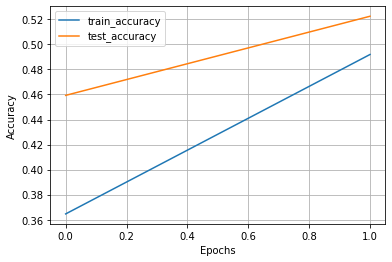

In [10]:
import matplotlib.pyplot as plt
plt.plot(range(0,epochs),H.history['accuracy'],label = 'train_accuracy')
plt.plot(range(0,epochs),H.history['val_accuracy'],label = 'test_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

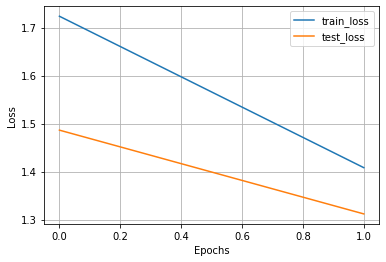

In [11]:
import matplotlib.pyplot as plt
plt.plot(range(0,epochs),H.history['loss'],label = 'train_loss')
plt.plot(range(0,epochs),H.history['val_loss'],label = 'test_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid();